# Cálculo de derivadas numéricas
## Proyecto PAPIME PE101019
- Autor: Luis M. de la Cruz Salas
- Rev: lun jul  6 19:29:17 CDT 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [27]:
params = {'figure.figsize' : (10,5),
          'text.usetex'    : True,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth'     : 3,
          'font.family': 'sans-serif'
         }

plt.rcParams.update(params)

### Aproximación de la primera derivada usando diferencias finitas hacia adelante (Forward):

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

Definimos una función de Python para calcular está formula como sigue:

In [3]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

In [4]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print(h)
print(x)

[1.      0.5     0.25    0.125   0.0625  0.03125]
[1. 1. 1. 1. 1. 1.]


In [5]:
h = np.asarray([0.1, 0.05, 0.01, 0.005, 0.001])
N = 5
x = np.ones(N)
print(h)
print(x)

[0.1   0.05  0.01  0.005 0.001]
[1. 1. 1. 1. 1.]


In [6]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs( np.cos(x) - forwardFD(np.sin,x,h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).transpose(), 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,0.100,0.042939
1,0.050,0.021257
2,0.010,0.004216
3,0.005,0.002106
4,0.001,0.000421


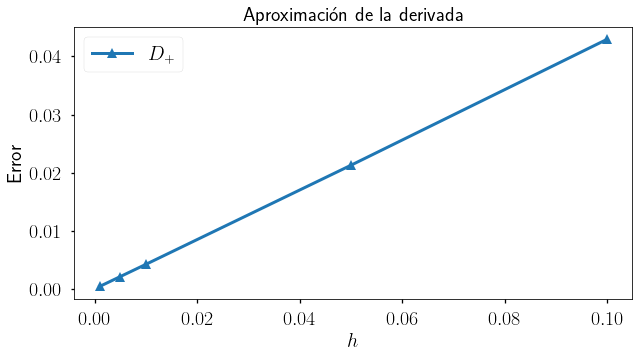

In [7]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacia atrás (Backward):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

Definimos una función de Python para calcular está formula como sigue:

In [8]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

In [9]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,0.100,0.042939,0.041138
1,0.050,0.021257,0.020807
2,0.010,0.004216,0.004198
3,0.005,0.002106,0.002101
4,0.001,0.000421,0.000421


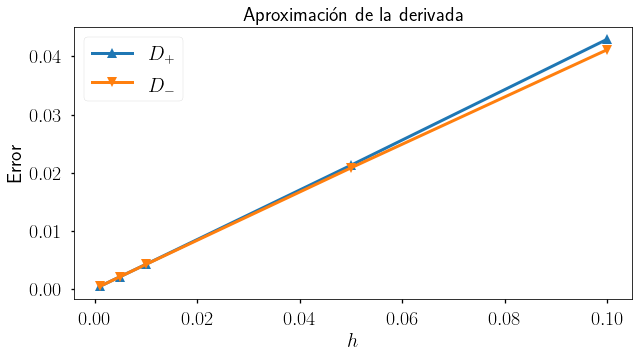

In [10]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacía centradas (Centered):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

Definimos una función de Python para calcular está formula como sigue:

In [11]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [12]:
print(x)
print(h)
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
Error

[1. 1. 1. 1. 1.]
[0.1   0.05  0.01  0.005 0.001]


,$h$,$D_+$,$D_-$,$D_0$
0,0.100,0.042939,0.041138,9.000537e-04
1,0.050,0.021257,0.020807,2.250978e-04
2,0.010,0.004216,0.004198,9.004993e-06
3,0.005,0.002106,0.002101,2.251257e-06
4,0.001,0.000421,0.000421,9.005045e-08


Observe que en este caso los errores son varios órdenes de magnitud más pequeños que para $D_+$ y $D_-$. Para hacer una gráfica más representativa usaremos escala log-log:

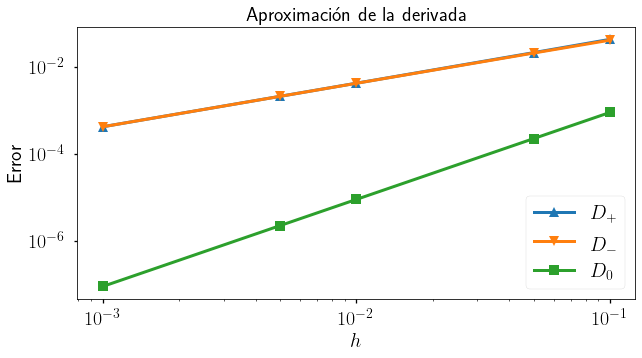

In [13]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

In [14]:
# Implementación
def D_p2(u,x,h):
    return (3*u(x) - 4*u(x-h) + u(x-2*h)) / (2*h)

In [15]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ep2 = np.fabs( np.cos(x) - D_p2(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,ep2]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_{+2}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_{+2}$
0,0.100,0.042939,0.041138,9.000537e-04,2.004728e-03
1,0.050,0.021257,0.020807,2.250978e-04,4.761431e-04
2,0.010,0.004216,0.004198,9.004993e-06,1.821981e-05
3,0.005,0.002106,0.002101,2.251257e-06,4.528776e-06
4,0.001,0.000421,0.000421,9.005045e-08,1.803108e-07


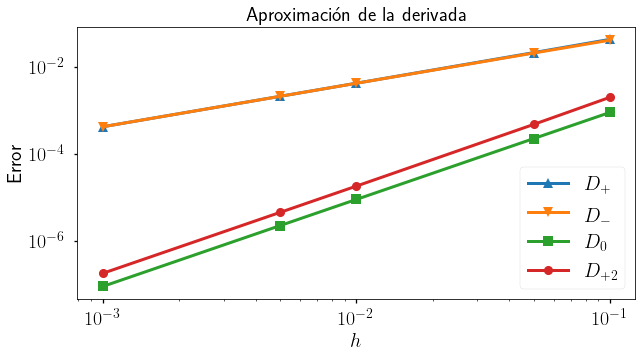

In [16]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, ep2, 'o-', label='$D_{+2}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

In [17]:
# Implementación
def D_m2(u,x,h):
    return (-3*u(x) + 4*u(x+h) - u(x+2*h)) / (2*h)

In [18]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
em2 = np.fabs( np.cos(x) - D_m2(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,ep2,em2]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_{+2}$', '$D_{-2}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_{+2}$,$D_{-2}$
0,0.100,0.042939,0.041138,9.000537e-04,2.004728e-03,1.584693e-03
1,0.050,0.021257,0.020807,2.250978e-04,4.761431e-04,4.235730e-04
2,0.010,0.004216,0.004198,9.004993e-06,1.821981e-05,1.779908e-05
3,0.005,0.002106,0.002101,2.251257e-06,4.528776e-06,4.476184e-06
4,0.001,0.000421,0.000421,9.005045e-08,1.803108e-07,1.798903e-07


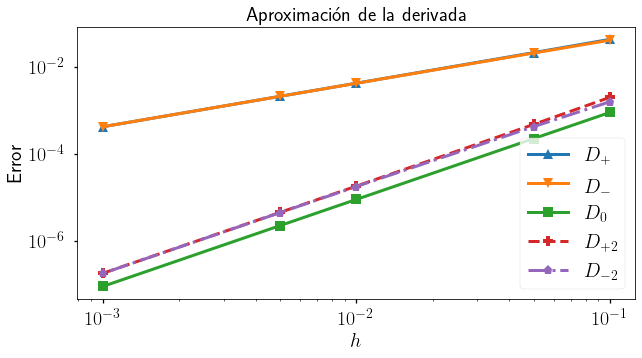

In [19]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, ep2, 'P--', label='$D_{+2}$')
plt.plot(h, em2, 'p-.', label='$D_{-2}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

In [20]:
# Implementación de D3
def D3(u,x,h):
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h)) / (6*h)

In [21]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
e3 = np.fabs( np.cos(x) - D3(np.sin,x,h) )


# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec,ep2,em2,e3]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_{+2}$','$D_{-2}$','$D_3$'])

Error.style.hide_index()

Error

,$h$,$D_+$,$D_-$,$D_0$,$D_{+2}$,$D_{-2}$,$D_3$
0,0.100,0.042939,0.041138,9.000537e-04,2.004728e-03,1.584693e-03,6.820693e-05
1,0.050,0.021257,0.020807,2.250978e-04,4.761431e-04,4.235730e-04,8.649142e-06
2,0.010,0.004216,0.004198,9.004993e-06,1.821981e-05,1.779908e-05,6.994130e-08
3,0.005,0.002106,0.002101,2.251257e-06,4.528776e-06,4.476184e-06,8.754000e-09
4,0.001,0.000421,0.000421,9.005045e-08,1.803108e-07,1.798903e-07,6.997947e-11


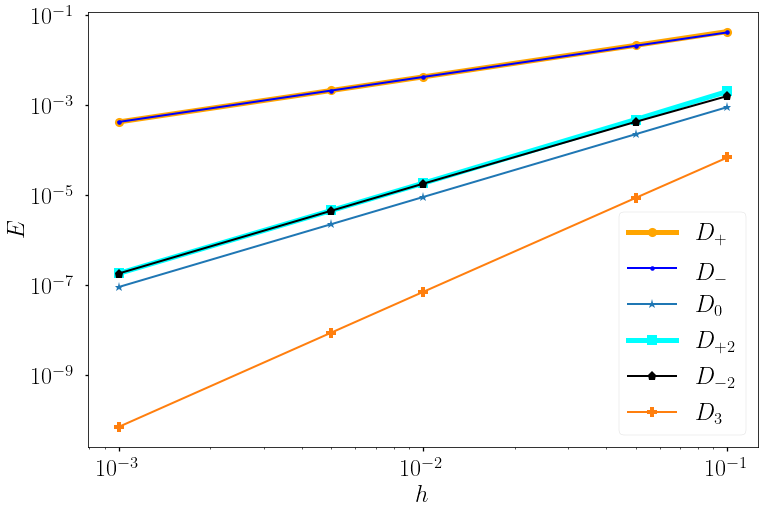

In [28]:
# Hacemos el gráfico del error vs h
plt.figure(figsize=(12,8))
plt.plot(h, ef, 'o-', lw=5, c='orange', label='$D_+$')
plt.plot(h, eb, '.-', lw=2, c='blue', label='$D_-$')
plt.plot(h, ec, '*-', lw=2, label='$D_0$')
plt.plot(h, ep2, 's-', lw=5, c='cyan', label='$D_{+2}$')
plt.plot(h, em2, 'p-', lw=2, c='k', label='$D_{-2}$')
plt.plot(h, e3, 'P-', lw=2, label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('$E$')
#plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.savefig('LogLogFDM.pdf')
plt.show()

## Ejercicio 0.
Para mejorar aún más la aproximación de la derivada se pueden usar más puntos en la fórmula de aproximación. Por ejemplo: 

$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$

- Agregar una función de Python para calcular la derivada con la fórmula anterior.
- Calcular el error, completar la tabla de errores y hacer el gráfico con todas las aproximaciones. 

Al final de este ejercicio se debe obtener un gráfico similar al de la siguiente figura:

<img src="../Figuras/dernum.png">

**Hint**: Recuerde que $u_i = u(x)$, $u_{i+1} = u(x+h)$, $u_{i-1} = u(x-h)$ y $u_{i-2} = u(x-2h)$.

# Herramienta interativa
La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. Puedes elegir la función y el tipo de aproximación. Después, puedes mover el punto donde se realiza la aproximación y el tamaño de la $h$.

In [ ]:
# LINUX y MACOS
%run "./utils/interactiveDerivadasNumericas.ipynb"

# Si usas WINDOWS debes comentar la línea de arriba y 
# descomentar la línea que sigue. Deberás también sustituir
# TU_DIRECTORIO por el directorio donde esté el repositorio GeoMaC

#%run "D:\\TU_DIRECTORIO\\GeoMaC\\DerivadasNumericas\\utils\\interactiveDerivadasNumericas.ipynb"

## Ejercicio 1.
Implementar la siguiente aproximación y graficarla junto con todos los resultados anteriores:

$$
f^\prime = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$

## Ejercicio 2.
Obtener los coeficientes $A$, $B$ y $C$ para una aproximación del siguiente tipo: 

$$
f^\prime = A f_i + B f_{i+1} + C f_{i+2}
$$

y luego implementar la fórmula y graficarla junto con los resultados anteriores.

¿Cuál de todas las aproximaciones usaría? ¿Por qué?

Los coeficientes de la fórmula son: $A = -3 / 2h$, $B = 2/h$ y $C = -1/2h$ de tal manera que la fórmula de diferencias queda como sigue:

$$
f^\prime = \frac{-3 f_i + 4 f_{i+1} - f_{i+2}}{2h}
$$

Si lo que se quiere es mejor precisión, entonces la aproximación que se debe usar es la $D_3$, pues con esta se obtiene un menor error. 

Si se requiere rapidez, entonces se podría usar $D_+$ o $D_-$.

Sin embargo, la que parece que tiene un mejor comportamiento, en términos de rapidez y precisión, es la $D_0$. 